## Analise exploratoria de dados

In [1]:
library(matrixStats)

Warning message:
package ‘matrixStats’ was built under R version 4.4.3 


## Estimativas de localização

In [2]:
lista = as.integer(runif(10, min=1, max=8))
lista

 [1] 7 1 3 7 3 3 7 3 5 3

In [3]:
length(lista)

[1] 10

### Media

$$
\bar{x} = \frac{\sum_{i=1}^n(x_i)}{n}
$$

* É a soma de todos os valores dividido pela quantidade de numeros

In [4]:
mean(lista)

[1] 4.2

### Média aparada

$$
\bar{x} = \frac{\sum_{i=p-1}^{n-p}(x_i)}{n-2p}
$$

* se calcula execluindo valores fixo de cada extremidade(valores atipicos)


In [5]:
sum(lista[2:9])/(length(lista)-2*(2))

[1] 5.333333

In [6]:
mean(lista, trim = 0.2)

[1] 4

> Elimina a influencia de valores atipicos

### Média ponderada

$$
\bar{x_w} = \frac{\sum_{i=1}^{n}(w_i\cdot x_i)}{\sum_{i=1}^{n}1\cdot w_i}
$$


In [7]:
weighted.mean(
  lista, w = lista*5
)

[1] 5.190476

In [8]:
data.frame(
  valor.nomal=(lista),
  valor.com.peso=(lista*0.5)
)

   valor.nomal valor.com.peso
1            7            3.5
2            1            0.5
3            3            1.5
4            7            3.5
5            3            1.5
6            3            1.5
7            7            3.5
8            3            1.5
9            5            2.5
10           3            1.5

> Os valores são intrinsecamente mais variaveis que outros e as observações altamente variáveis recebem um peso menor.

### Mediana

In [9]:
sort(lista)

 [1] 1 3 3 3 3 3 5 7 7 7

In [10]:
median(lista)

[1] 3

## Calculando via dataset

In [11]:
data = read.csv(file = 'dataset/state.csv')
head(data, n = 10)

         State Population Murder.Rate Abbreviation
1      Alabama    4779736         5.7           AL
2       Alaska     710231         5.6           AK
3      Arizona    6392017         4.7           AZ
4     Arkansas    2915918         5.6           AR
5   California   37253956         4.4           CA
6     Colorado    5029196         2.8           CO
7  Connecticut    3574097         2.4           CT
8     Delaware     897934         5.8           DE
9      Florida   18801310         5.8           FL
10     Georgia    9687653         5.7           GA

`Media, media aparada e mediana`

In [12]:
# Calculando a média polulacional dos estados unidos
mean(data$Population)

[1] 6162876

In [13]:
# Media aparanda removendo 10% de dados de cada extremidade
mean(data$Population, trim = 0.1)

[1] 4783697

In [14]:
# Mediana
median(data$Population)

[1] 4436370

`Media ponderada`

Calculando a taxa media de homicidios para o pais. Para tal precisamos calcular a media ponderada ou mediana ponderada para contabilizar as diferente populações nos estados

In [15]:
weighted.mean(
  x = data$Murder.Rate, w = data$Population
)

[1] 4.445834

In [16]:
matrixStats::weightedMedian(
  data$Murder.Rate, w=data$Population
)

[1] 4.4

## Estimativa de variabilidade

Mede se os valores dos dados estão muito agrupados ou distribuidos.

* Variancia(Erro quadratico médio)
    * Soma dos quadrados dos devios da média

* Desvio padrão(norma l1)
    * Raiz quadrada da variancia

* Desvio absoluto médio
    * Media do valor abs dos desvio da media

* Amplitude 
    * Maior valor - menor valor

* Percentil(quantil)
    * O valor tal que a porcentagem de p dos valores assumo esse valor ou menos e a porcentagem (100-p) assume esse valor ou mais.

* Amplitude interquartilica(IQR)
    * Diferenta entre 75-25 percentil

### Desvios padrão

* As estimativas de variabilidade mais conhecidas são a variancai e desvio padrão, que são baseados nos devios quadraticos

    * $s^2 = \frac{\sum_{i=1}^n(xi-\bar{x})^2}{n-1}$

    * $s = \sqrt{\text{variancia}}$

> Contudo, não são totalmente robustos frente a outliers e ao valores extremos. Variancia e std são extremante sensiveis aos valores atípicos. Uma estima robusta de variabilidade é **Desvio absoluto mediano da mediana**

### Calculando via dataset

In [17]:
sd(data$Population)

[1] 6848235

In [18]:
IQR(data$Population)

[1] 4847308

In [19]:
quantile(data$Population)

      0%      25%      50%      75%     100% 
  563626  1833004  4436370  6680312 37253956 

In [20]:
mad(data$Population)

[1] 3849870

## Explorando a distribuição de dados

In [21]:
quantile(data$Murder.Rate, p=c(.05, .25, .5, .75, .95))

   5%   25%   50%   75%   95% 
1.600 2.425 4.000 5.550 6.510 

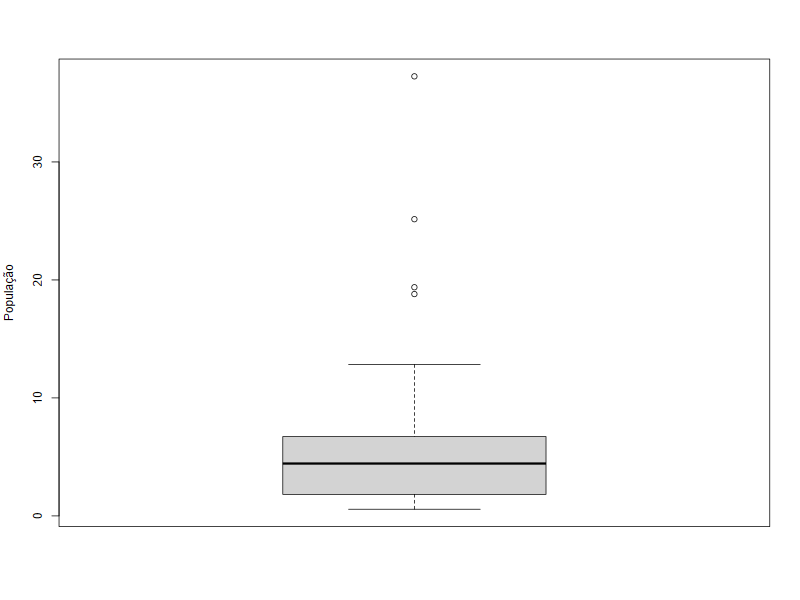

In [22]:
boxplot(data$Population/1e+6, ylab='População')

## Tabela de frequencia

In [23]:
breaks= seq(
  from=min(data$Population),
  to = max(data$Population),
  length = 11
)

pop_freq = cut(data$Population, breaks = breaks, right = TRUE, include.lowest = TRUE)

table(pop_freq)

pop_freq
[5.64e+05,4.23e+06]  (4.23e+06,7.9e+06]  (7.9e+06,1.16e+07] (1.16e+07,1.52e+07] (1.52e+07,1.89e+07] (1.89e+07,2.26e+07] (2.26e+07,2.62e+07] 
                 24                  14                   6                   2                   1                   1                   1 
(2.62e+07,2.99e+07] (2.99e+07,3.36e+07] (3.36e+07,3.73e+07] 
                  0                   0                   1 

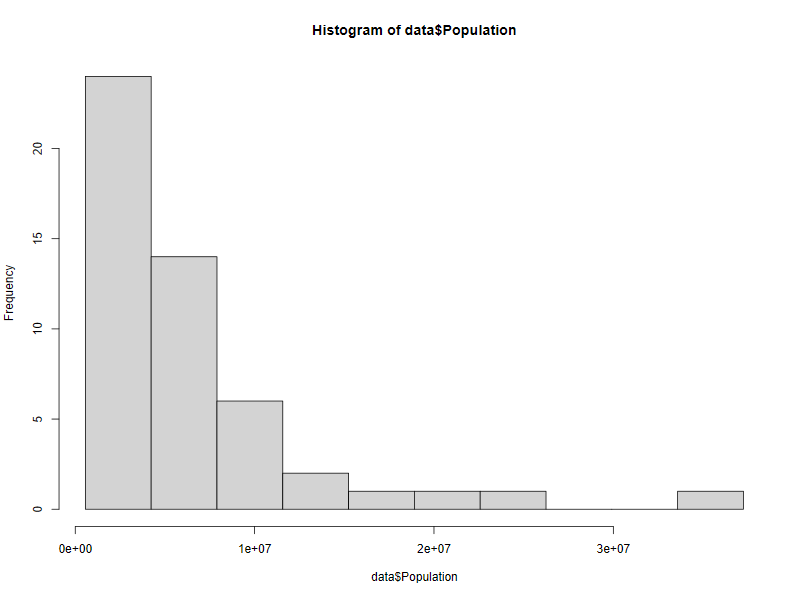

In [24]:
hist(data$Population, breaks = breaks)

## Grafico de densidade e estimativass

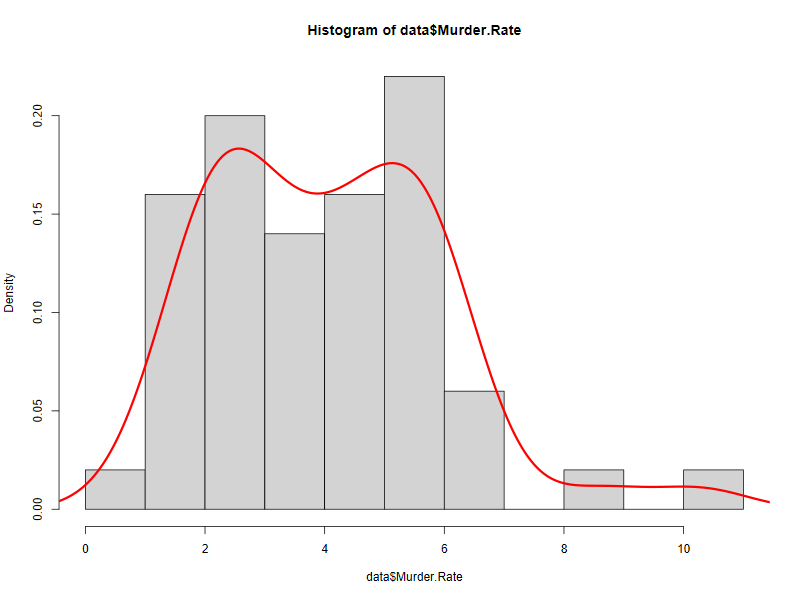

In [25]:
hist(data$Murder.Rate, freq = FALSE)
lines(density(data$Murder.Rate), lwd=3, col='red')

Relacionado ao hist, existe um graficvo de densidade que mostra a distribuição dos valores dos dados como uma linha continua.

## Correlação

In [26]:
sp_500 = read.csv('dataset/sp500_data.csv', row.names=1)
head(sp_500[1:2], n=2)

           ADS          CA
1993-01-29   0  0.06012444
1993-02-01   0 -0.18038896

In [27]:
sp_500_symbol = read.csv('dataset/sp500_sectors.csv',stringsAsFactors = FALSE)
head(sp_500_symbol,2)

                  sector sector_label                            sub_sector symbol
1 information_technology   Technology data_processing_&_outsourced_services    ADS
2 information_technology   Technology                      systems_software     CA

In [28]:
etf = sp_500[row.names(sp_500)>'2012-07-01', sp_500_symbol[sp_500_symbol$sector=='etf', 'symbol']]

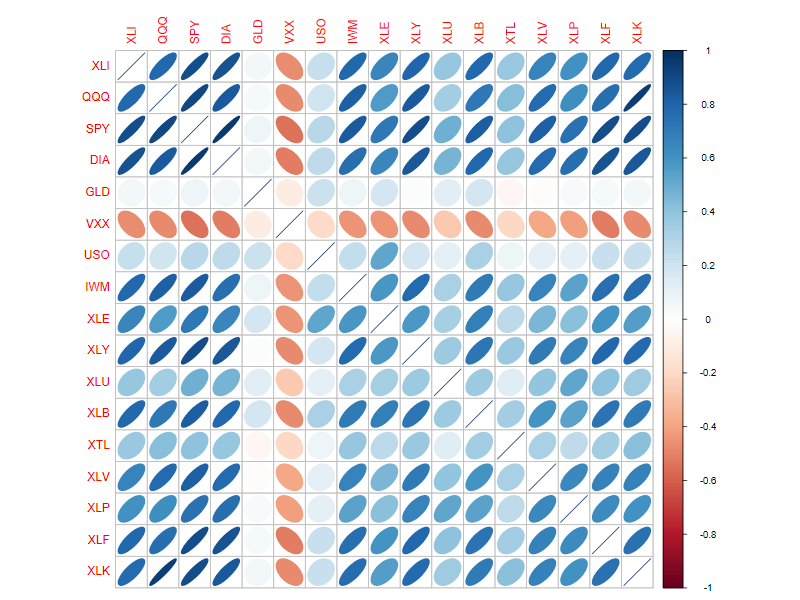

In [29]:
corrplot::corrplot(
  cor(etf), method='ellipse'
)

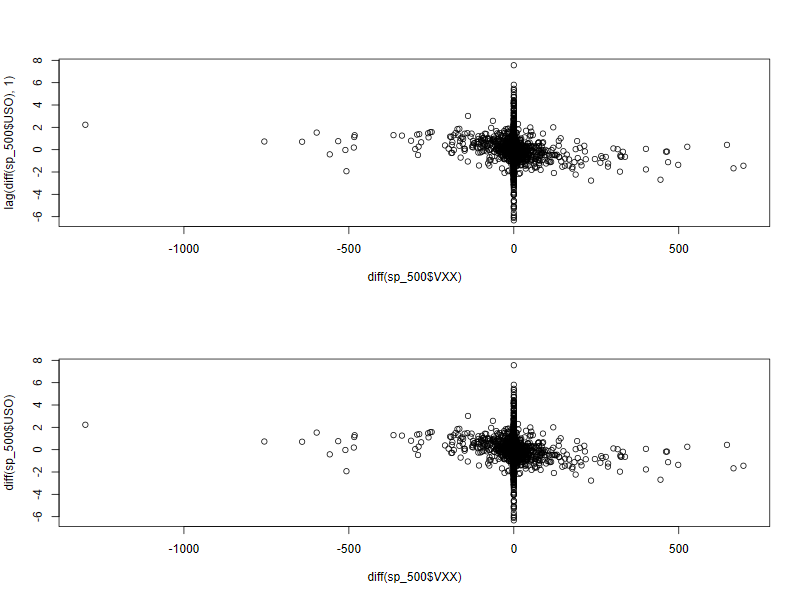

In [30]:
par(mfrow=c(2,1))
plot(diff(sp_500$VXX), lag(diff(sp_500$USO),1))
plot(diff(sp_500$VXX), diff(sp_500$USO))

In [31]:
cor(diff(sp_500$VXX), lag(diff(sp_500$USO),1), use='pairwise.complete.obs')

[1] -0.1603168

## Compartimentação hexagonal e contornos

Grafico de dispersão são bons quando há um número relativamente pequeno de valores de dados. Para uma conjunto de milhares ou milhores um grafico de dispersão seria denso. Então precisamos de uma grafico diferente para visuallizar tao relação.

In [32]:
kc_tax = read.csv(file = 'dataset/kc_tax.csv')

In [33]:
kc_tax0 = subset(
  kc_tax, TaxAssessedValue<750000 & SqFtTotLiving > 100 & SqFtTotLiving<3500
)
nrow(kc_tax0)

[1] 432693

In [34]:
library(ggplot2)

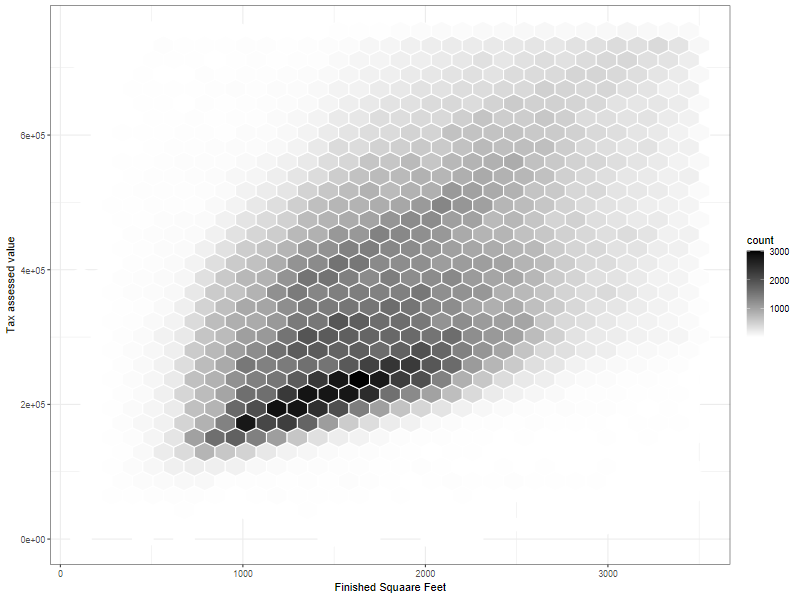

In [35]:
ggplot(
  kc_tax0, (aes(x=SqFtTotLiving, y=TaxAssessedValue))
) +
  stat_binhex(color='white') + 
  theme_bw() + 
  scale_fill_gradient(low='white', high='black') + 
  labs(x='Finished Squaare Feet', y='Tax assessed value')

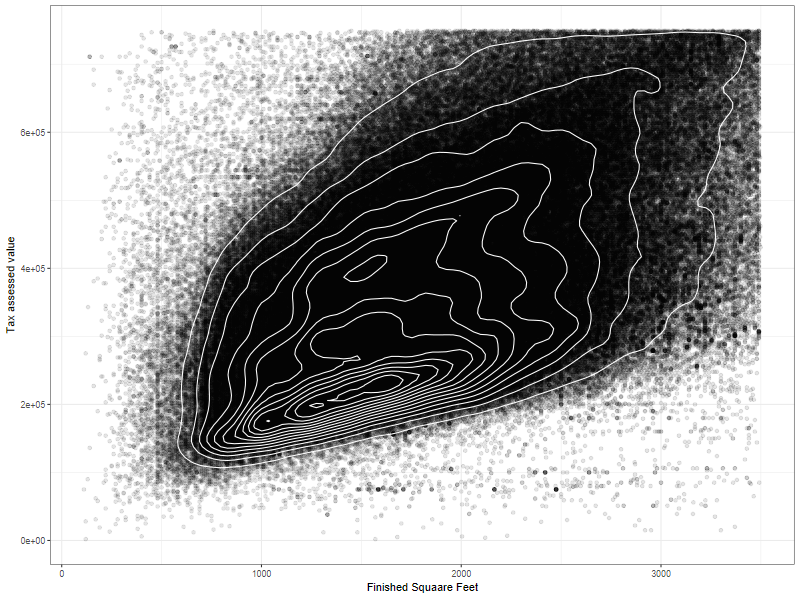

In [36]:
ggplot(
  kc_tax0, (aes(x=SqFtTotLiving, y=TaxAssessedValue))
) +
  theme_bw() + 
  geom_point(alpha=0.1) +
  geom_density2d(color='white') +
  labs(x='Finished Squaare Feet', y='Tax assessed value')

> `geom_density2d()` traça curvas de densidade bivariada, que funcionam como contornos indicando regiões onde há maior concentração de pontos.

## Duas variaveis categorias

In [37]:
library(descr)

Warning message:
package ‘descr’ was built under R version 4.4.3 


In [38]:
lc_loans = read.csv(file = 'dataset/lc_loans.csv')

In [39]:
x_tab = CrossTable(
  lc_loans$grade,
  lc_loans$status,
  prop.c = FALSE,
  prop.chisq = FALSE,
  prop.t = FALSE
)
x_tab

   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

                  lc_loans$status
lc_loans$grade    Charged Off   Current   Fully Paid     Late    Total
----------------------------------------------------------------------
A                        1562     50051        20408      469    72490
                        0.022     0.690        0.282    0.006    0.161
----------------------------------------------------------------------
B                        5302     93852        31160     2056   132370
                        0.040     0.709        0.235    0.016    0.294
----------------------------------------------------------------------
C                        6023     88928        23147     2777   120875
                        0.050     0.736        0.191    0.023    0.268
----------------------------------------------------------------------
D                        5007     53281        13681

> Uma forma de resumo duas variaveis categorias é por meio da tabela de contigencia - contagem por categoria